<a href="https://colab.research.google.com/github/ridmi02/test-py-repo/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_data=pd.read_csv("loan.csv")

In [3]:
raw_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.shape


(20000, 142)

In [5]:
raw_data.dtypes


,0
id,float64
member_id,float64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,int64
...,...
settlement_status,float64
settlement_date,float64
settlement_amount,float64
settlement_percentage,float64


In [6]:
raw_data['loan_amnt'].describe()


,loan_amnt
count,20000.000000
mean,16111.383750
std,10369.193761
min,1000.000000
25%,8000.000000
50%,14000.000000
75%,22000.000000
max,40000.000000


In [8]:
raw_data= raw_data.drop(['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d',
'verification_status',
'pymnt_plan',
'funded_amnt_inv',
'sub_grade',
'out_prncp',
'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt', 'initial_list_status'], axis =1)

In [10]:
col_num = 0
TotalObjects = raw_data.shape[0]

print("Column\t\t\t\t\tNull Values%")
for x in raw_data.columns:
    nullCount = raw_data[x].isnull().sum()
    nullPercent = nullCount * 100 / TotalObjects

    if nullCount > 0 and nullPercent > 20:
        col_num += 1
        raw_data.drop(x, axis=1, inplace=True)
        print(f"{x}\t\t\t\t\t{nullPercent:.2f}%")

print(f"\nA total of {col_num} columns deleted!")


Column					Null Values%
id					100.00%
member_id					100.00%
url					100.00%
desc					100.00%
mths_since_last_delinq					56.38%
mths_since_last_record					88.41%
mths_since_last_major_derog					77.47%
annual_inc_joint					87.84%
dti_joint					87.84%
verification_status_joint					89.17%
mths_since_recent_bc_dlq					80.36%
mths_since_recent_revol_delinq					71.30%
revol_bal_joint					87.84%
sec_app_earliest_cr_line					87.84%
sec_app_inq_last_6mths					87.84%
sec_app_mort_acc					87.84%
sec_app_open_acc					87.84%
sec_app_revol_util					88.00%
sec_app_open_act_il					87.84%
sec_app_num_rev_accts					87.84%
sec_app_chargeoff_within_12_mths					87.84%
sec_app_collections_12_mths_ex_med					87.84%
sec_app_mths_since_last_major_derog					96.30%
hardship_type					100.00%
hardship_reason					100.00%
hardship_status					100.00%
deferral_term					100.00%
hardship_amount					100.00%
hardship_start_date					100.00%
hardship_end_date					100.00%
payment_plan_start_date					100.00%
hardship_length		

In [11]:
raw_data.shape


(20000, 79)

In [12]:
raw_data['emp_title'].fillna('Unknown',inplace = True)
raw_data['dti'].fillna(0,inplace=True)
raw_data['revol_util'].fillna(raw_data['revol_util'].mean(),inplace = True)

/tmp/ipython-input-12-2644805586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['emp_title'].fillna('Unknown',inplace = True)
/tmp/ipython-input-12-2644805586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [13]:
raw_data['emp_title'].fillna('Unknown',inplace = True)


In [14]:
raw_data.head()


,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [15]:
raw_data['dti'].fillna(0,inplace=True)


/tmp/ipython-input-15-3998727712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['dti'].fillna(0,inplace=True)


In [16]:
raw_data['revol_util'].fillna(raw_data['revol_util'].mean(),inplace = True)


/tmp/ipython-input-16-490939787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['revol_util'].fillna(raw_data['revol_util'].mean(),inplace = True)


In [17]:
raw_data['emp_title'].fillna('Complete',inplace = True)


In [18]:
pd.unique(raw_data['emp_length'].values)


array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [19]:
def CalculateEmployeeLength(year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    elif pd.isnull(year):
        return 0  # Handle missing values
    else:
        yr = str(year).rstrip(' years')
        try:
            return float(yr)
        except:
            return 0  # fallback for any unexpected format


In [20]:
raw_data['emp_length']=raw_data['emp_length'].apply(CalculateEmployeeLength)


In [21]:
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    if value > 5000 and value <= 10000:
        return '5K-10K'
    if value > 10000 and value <= 15000:
        return '10K-15K'
    if value > 15000 and value <= 20000:
        return '15K-20K'
    if value > 20000 and value <= 25000:
        return '20K-25K'
    if value > 25000 and value <= 30000:
        return '25K-30K'
    if value > 30000:
        return '30K and Above'
    return 'Other'


In [22]:
loan_ranges = raw_data['loan_amnt'].apply(CalculateLoanRanges)


In [23]:
loan_ranges.value_counts()


,count
loan_amnt,
5K-10K,5063
10K-15K,3472
15K-20K,3118
5K and Below,2898
30K and Above,2268
20K-25K,1834
25K-30K,1347


Text(0.5, 1.0, 'Pie Chart of Loan Amount')

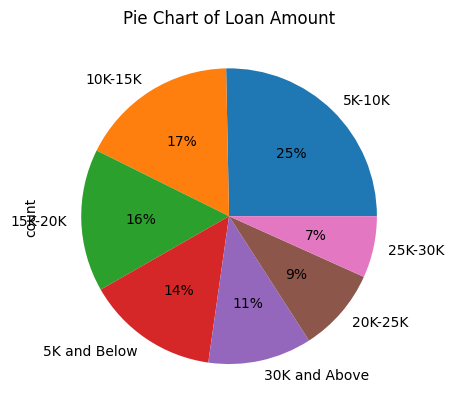

In [24]:
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

<Axes: xlabel='purpose'>

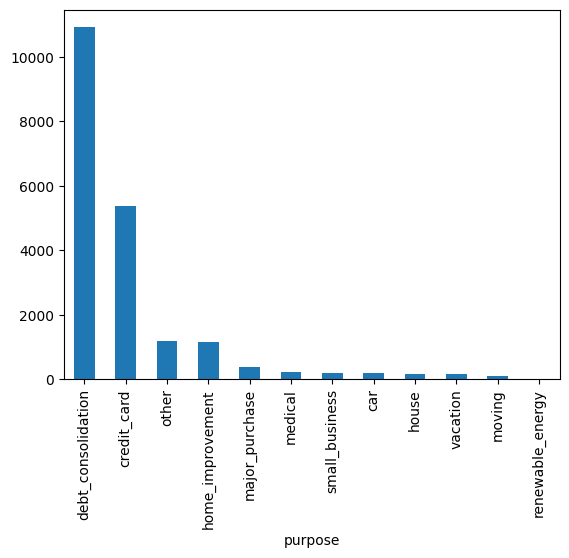

In [25]:
pur = raw_data['purpose'].value_counts()
pur.plot(kind='bar')

In [27]:
raw_data.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')
